In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
train = pd.read_csv("D:/sign_mnist_train.csv")
validation_set = pd.read_csv("D:/sign_mnist_test.csv")

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


<AxesSubplot:ylabel='count'>

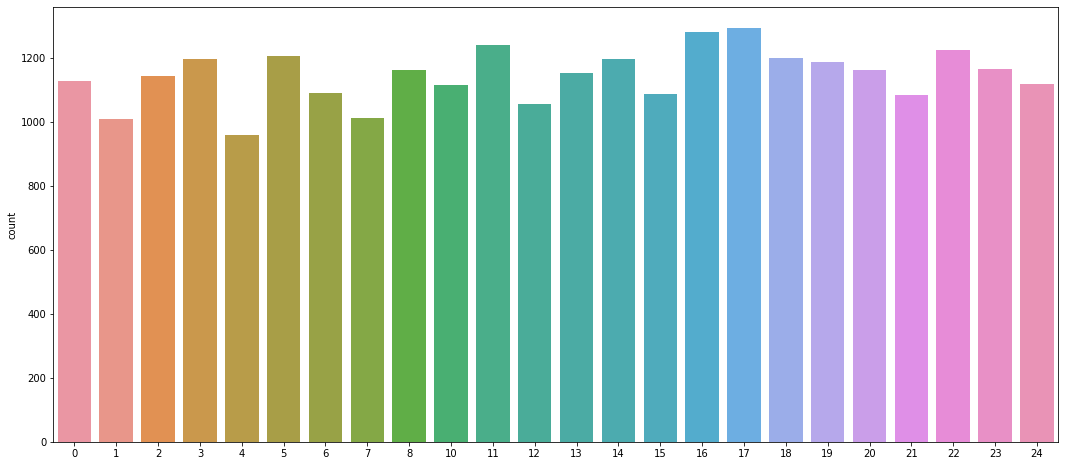

In [5]:
labels = train['label'].values
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

Using TensorFlow backend.


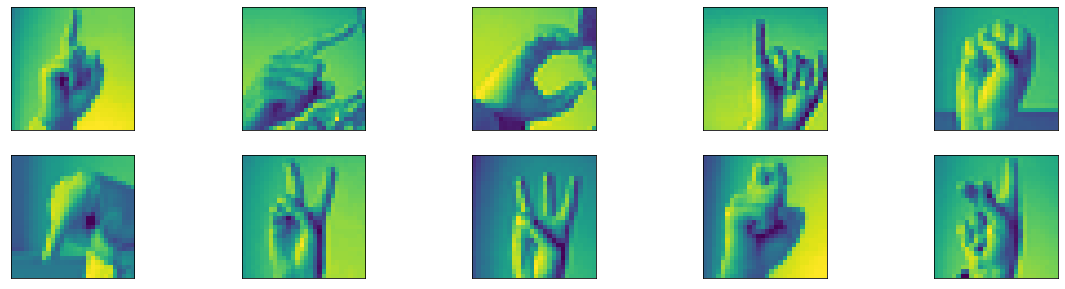

In [6]:
from keras.utils import to_categorical 

count=0
data=train.values[0:,1:]
labels = train.values[0:,0]
labels = to_categorical(labels)
fig = plt.figure(figsize=(20, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    count+=i
    sample = data[count]
    ax.imshow(sample.reshape((28,28)))
plt.show()

In [7]:
x_train = train.iloc[0:27455, 1:785].values
y_train = train.iloc[0:27455, 0].values

x_test = validation_set.iloc[0:7172, 1:785].values
y_test = validation_set.iloc[0:7172,0].values

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.fit_transform(y_test)

# KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt

KNN = KNeighborsClassifier(n_neighbors=165)
classifier = KNN.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='micro')
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("F1 Score:")
print(f1)
print("Accuracy:")
print(acc)

D:\TheAnaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
D:\TheAnaconda\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.flo

Confusion Matrix:
[[322   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   4]
 [  1 296   0  43   0   0   0   4   0  49   0   0   0   0   2   0  21   0
    0  10   5   1   0   0]
 [  0   0 303   0   0   0   1   0   0   0   2   0   0   4   0   0   0   0
    0   0   0   0   0   0]
 [  0  13   0 204   0   0   0   0   0   8   0   0   2   0   0   0   7   0
    2   6   1   1   1   0]
 [  7  27   0   0 408   0   0   0   4   0   0   2  21   0   0   0   0  29
    0   0   0   0   0   0]
 [  0  22   3  10   0 148  15   0   0   0   0   0   0   3   0   3   1   0
   22  13   5   1   0   1]
 [  0   0   0  12   0  11 270  20   0   0   0   0   0   0   0   1   0   0
   34   0   0   0   0   0]
 [  0   6   0   0   0   0 113 302   0   0   0   0   0   0   0   0   0   0
   13   0   2   0   0   0]
 [ 33  24   0   2   4   0   0   0 167   0   0   2   4   0   0   0   0  28
   23   0   0   0   0   1]
 [  0   3   0  18   0   0   1   1  14 111   0   0   0   0   0   0  60   4

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


model = LogisticRegression()
model.fit(x_train, y_train)
Logisticprediction=model.predict(x_test)

print('Accuracy of logistic regression: {0:.2f}'.format(accuracy_score(Logisticprediction,y_test) * 100))
print(classification_report(y_test, Logisticprediction))

D:\TheAnaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\TheAnaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of logistic regression: 61.38
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       331
           1       1.00      0.81      0.89       432
           2       0.75      0.86      0.81       310
           3       0.74      0.92      0.82       245
           4       0.80      0.84      0.82       498
           5       0.53      0.81      0.64       247
           6       0.66      0.71      0.69       348
           7       0.81      0.67      0.73       436
           8       0.55      0.57      0.56       288
           9       0.62      0.31      0.41       331
          10       0.80      0.81      0.81       209
          11       0.64      0.49      0.55       394
          12       0.58      0.41      0.48       291
          13       0.98      0.46      0.62       246
          14       0.70      0.54      0.61       347
          15       0.67      0.74      0.71       164
          16       0.20      0.43      0.2

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train, y_train)
rfprediction=random_forest_model.predict(x_test)

print('Accuracy of random forest: {0:.2f}'.format(accuracy_score(y_test,rfprediction) * 100))
print(classification_report(y_test, rfprediction))

D:\TheAnaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
D:\TheAnaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
D:\TheAnaconda

Accuracy of random forest: 66.90
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       331
           1       0.75      0.82      0.78       432
           2       0.83      0.93      0.88       310
           3       0.52      0.83      0.64       245
           4       0.75      0.88      0.81       498
           5       0.67      0.89      0.76       247
           6       0.66      0.78      0.72       348
           7       0.87      0.81      0.84       436
           8       0.47      0.47      0.47       288
           9       0.56      0.47      0.52       331
          10       0.73      0.86      0.79       209
          11       0.63      0.55      0.59       394
          12       0.55      0.40      0.46       291
          13       0.85      0.66      0.74       246
          14       0.92      0.93      0.92       347
          15       0.87      0.96      0.91       164
          16       0.21      0.44      0.29     

D:\TheAnaconda\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


# MLP

In [11]:
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train, y_train)
xRTrain = scaler.transform(x_train)
xRTest = scaler.transform(x_test)
mlpc = MLPClassifier().fit(xRTrain,y_train)
predict = mlpc.predict(xRTest)

print('Accuracy : {:.2f}%'.format(accuracy_score(y_test,predict) * 100))
print(classification_report(y_test, predict))

Accuracy : 80.93%
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       331
           1       0.95      0.90      0.92       432
           2       0.99      0.93      0.96       310
           3       0.79      1.00      0.88       245
           4       0.92      0.93      0.93       498
           5       0.72      0.91      0.80       247
           6       0.88      0.94      0.91       348
           7       0.92      0.91      0.91       436
           8       0.83      0.80      0.81       288
           9       0.70      0.54      0.61       331
          10       0.85      0.93      0.89       209
          11       0.86      0.77      0.81       394
          12       0.70      0.64      0.67       291
          13       0.81      0.64      0.71       246
          14       0.99      1.00      1.00       347
          15       0.83      0.87      0.85       164
          16       0.29      0.43      0.34       144
         

# SVM

In [12]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print('Accuracy : {:.2f}%'.format(accuracy_score(y_test,predict) * 100))
print(classification_report(y_test, predict))

Accuracy : 78.17%
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       331
           1       1.00      0.95      0.97       432
           2       0.78      0.98      0.87       310
           3       0.89      1.00      0.94       245
           4       0.92      1.00      0.96       498
           5       0.68      0.83      0.75       247
           6       0.84      0.86      0.85       348
           7       0.95      0.88      0.91       436
           8       0.73      0.74      0.74       288
           9       0.62      0.40      0.48       331
          10       0.58      0.60      0.59       209
          11       0.87      0.69      0.77       394
          12       0.88      0.63      0.74       291
          13       0.88      0.65      0.75       246
          14       0.90      1.00      0.95       347
          15       0.76      0.95      0.85       164
          16       0.30      0.67      0.41       144
         

# CNN

In [23]:
import keras

train.shape

(27455, 785)

In [26]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [27]:
train.drop('label',axis=1,inplace = True)

In [28]:
images = train.values
print(images.dtype, np.round(images.min(), 4), np.round(images.max(), 4), images.shape)

int64 0 255 (27455, 784)


Text(0.5, 0.98, 'Grayscale images')

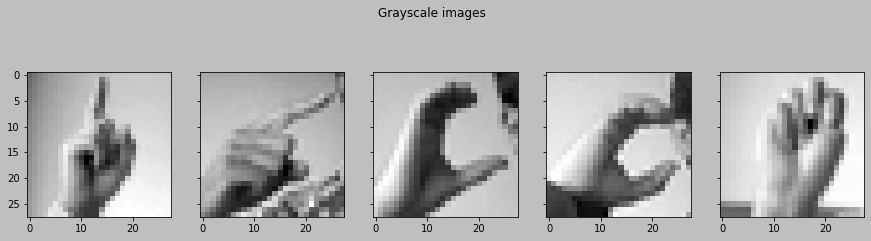

In [29]:
plt.style.use('grayscale')
fig, axs = plt.subplots(1, 5, figsize=(15, 4), sharey=True)
for i in range(5): 
        axs[i].imshow(images[i].reshape(28,28))
fig.suptitle('Grayscale images')

In [30]:
images = images/255

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size = 0.3, stratify = labels, random_state = 1)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, stratify = labels, random_state = 1)

D:\TheAnaconda\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
D:\TheAnaconda\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

In [32]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'val samples')

19218 train samples
8237 test samples
8237 val samples


In [33]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16, kernel_size=(4,4), activation = 'relu', input_shape=(28, 28 ,1), padding='same' ))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size=(4,4), activation = 'relu', input_shape=(28, 28 ,1), padding='same' ))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size=(4,4), activation = 'relu', input_shape=(28, 28 ,1), padding='same' ))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(24, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)         

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [36]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_val, y_val), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 19218 samples, validate on 8237 samples
Epoch 1/20
 - 33s - loss: 1.0407 - accuracy: 0.6683 - val_loss: 0.2843 - val_accuracy: 0.9415

Epoch 00001: val_loss improved from inf to 0.28434, saving model to model.weights.best.hdf5
Epoch 2/20
 - 31s - loss: 0.1149 - accuracy: 0.9623 - val_loss: 0.0489 - val_accuracy: 0.9880

Epoch 00002: val_loss improved from 0.28434 to 0.04888, saving model to model.weights.best.hdf5
Epoch 3/20
 - 29s - loss: 0.0427 - accuracy: 0.9864 - val_loss: 0.0594 - val_accuracy: 0.9819

Epoch 00003: val_loss did not improve from 0.04888
Epoch 4/20
 - 29s - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0240 - val_accuracy: 0.9921

Epoch 00004: val_loss improved from 0.04888 to 0.02405, saving model to model.weights.best.hdf5
Epoch 5/20
 - 30s - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0012 - val_accuracy: 0.9999

Epoch 00005: val_loss improved from 0.02405 to 0.00124, saving model to model.weights.best.hdf5
Epoch 6/20
 - 30s - loss: 0.0167 - accuracy: 

In [37]:
model.load_weights('model.weights.best.hdf5')

In [39]:
test=validation_set
test_labels = test['label'].values
test.drop('label', axis = 1, inplace = True)
test_images = test.values/255
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)


test_images.shape

(7172, 28, 28, 1)

In [41]:
y_pred = model.predict(test_images)
from sklearn.metrics import accuracy_score,classification_report
y_pred = y_pred.round()
print('Accuracy : {:.2f}%'.format(accuracy_score(test_labels,y_pred) * 100))
print(classification_report(test_labels,y_pred))

Accuracy : 96.18%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.98      0.99       432
           2       0.98      1.00      0.99       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       0.93      0.93      0.93       348
           7       1.00      0.94      0.97       436
           8       0.97      1.00      0.98       288
           9       1.00      0.94      0.97       331
          10       0.91      1.00      0.95       209
          11       1.00      0.96      0.98       394
          12       0.95      0.92      0.94       291
          13       1.00      0.98      0.99       246
          14       1.00      0.94      0.97       347
          15       0.67      1.00      0.81       164
          16       0.89      1.00      0.94       144
         

D:\TheAnaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


# ENSEMBLE

In [15]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10)

estimators = [] 

estimators.append(('SVM', clf)) 

estimators.append(('Random Forest', random_forest_model)) 

estimators.append(('Logistic regression', model)) 

estimators.append(('KNN', classifier)) 
  
ensemble = VotingClassifier(estimators) 

ensemble.fit(x_train, y_train)


y_test_pred = ensemble.predict(x_test)

D:\TheAnaconda\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
D:\TheAnaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the r

In [18]:
print(f"\nConfusion matrix : \n{confusion_matrix(y_test, y_test_pred)}")
print(f"\nAccuracy : {accuracy_score(y_test, y_test_pred) * 100 :.2f}%")
print(f"\nClassification report:\n{classification_report(y_test, y_test_pred)}")


Confusion matrix : 
[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 411   0   5   0   0   0   0   0  16   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 310   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 242   0   0   0   0   0   0   0   0   0   0   0   0   3   0
    0   0   0   0   0   0]
 [  0   0   0   0 495   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   0   0   0]
 [  0   8  20   2   0 216   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0]
 [  0   0   0   5   0   1 323   0   0   0   0   0   0   0   0   1   0   0
   18   0   0   0   0   0]
 [  1   0   0   0  12   0  52 356   0   0   0   0   0   0   0   0   0   0
    0  15   0   0   0   0]
 [ 14   1   0   2   1   1   0   1 213   1   0   5   0   0   0   0  18   0
    3   0   0   0   0  28]
 [  1   2   0  29   2  26   1   0  24 156   1   0   0   0   2   0  35 